In [11]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
M=nx.read_gml("polblogs.gml")

In [13]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

C:\Users\eek00\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


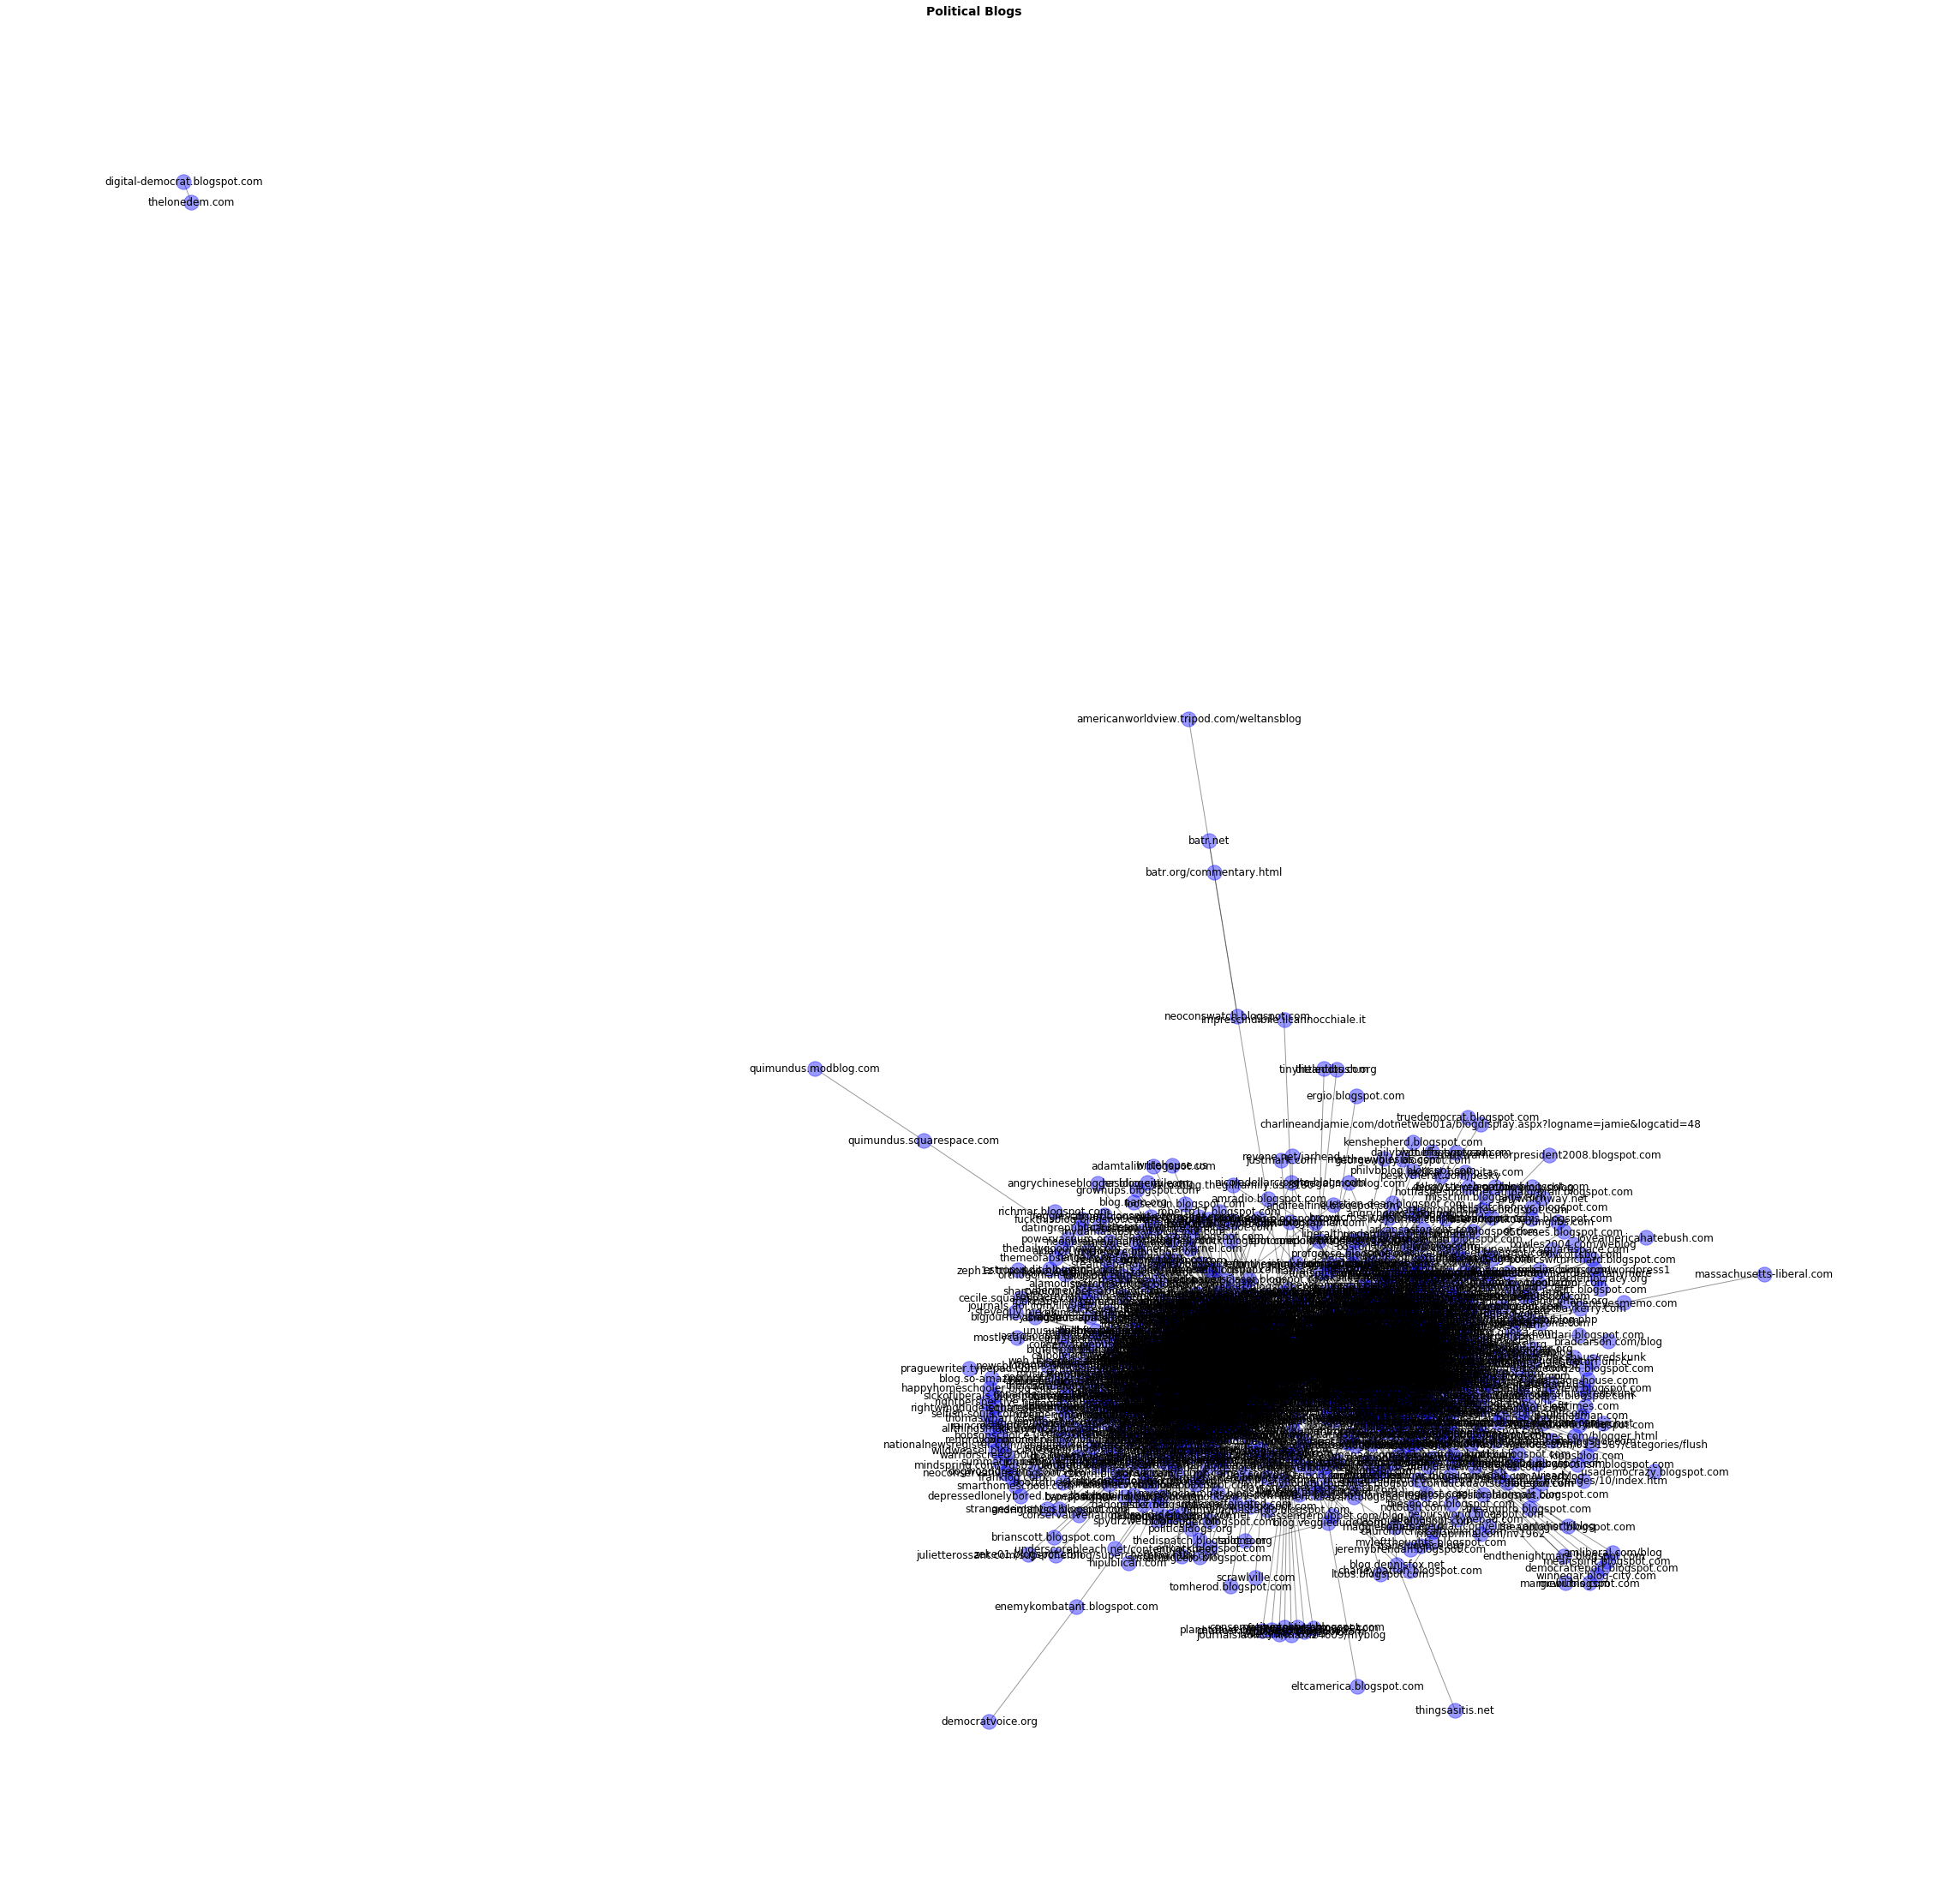

In [14]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blogs", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [15]:
centrality=nx.eigenvector_centrality(G)

In [16]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))

In [17]:
sorted_blog_list = blog_list.sort(key=lambda x: x[1], reverse=True)
sorted(blog_list[0:10], key=lambda x: x[1], reverse=True)

[('atrios.blogspot.com', 0.19480797936637684),
 ('dailykos.com', 0.1608974020523482),
 ('washingtonmonthly.com', 0.14653924259836862),
 ('digbysblog.blogspot.com', 0.1426436922171831),
 ('bodyandsoul.typepad.com', 0.14113489174330351),
 ('liberaloasis.com', 0.1395237157110786),
 ('tbogg.blogspot.com', 0.1370364169982425),
 ('corrente.blogspot.com', 0.1294175927409614),
 ('talkingpointsmemo.com', 0.12700519780790948),
 ('dneiwert.blogspot.com', 0.12237564692546019)]

### 3.  What are the 10 least influential blogs?



In [18]:
sorted_blog_list = blog_list.sort(key=lambda x: x[1], reverse=False)
sorted(blog_list[0:10], key=lambda x: x[1], reverse=False)

[('digital-democrat.blogspot.com', 1.7763251097559653e-72),
 ('thelonedem.com', 1.7763251097559653e-72),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('quimundus.modblog.com', 6.682929975006485e-08),
 ('batr.org/commentary.html', 6.795517611554003e-07),
 ('batr.net', 6.796325594929456e-07),
 ('democratvoice.org', 1.0233388204113296e-06),
 ('quimundus.squarespace.com', 6.061741218869528e-06),
 ('massachusetts-liberal.com', 9.4833652357345e-06),
 ('thingsasitis.net', 1.1736249650658601e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

##### Create Repulican and Democrat subgraphs

In [19]:
rep = []
dem = []

for node in M.node:
    if (M.node[node]['value'] == 1):
        rep.append(node)
        #rep.append(node, M.node[node])
    else:
        dem.append(node)
        #D.add_node(node, M.node[node]) 

R = M.subgraph(rep)
D = M.subgraph(dem)

##### Create weighted republican graph

In [20]:
RG = nx.Graph()
for u,v,data in R.edges_iter(data=True):
    if RG.has_edge(u,v):
        RG[u][v]['weight'] += 1
    else:
        RG.add_edge(u, v, weight=1)

In [24]:
Rcentrality=nx.eigenvector_centrality(RG)
rep_list=[]
for node in Rcentrality:
    rep_list.append((node,Rcentrality[node]))

##### Determine 10 most influential republican blogs

In [25]:
sorted_rep_list = rep_list.sort(key=lambda x: x[1], reverse=True)
sorted(rep_list[0:10], key=lambda x: x[1], reverse=True)

[('instapundit.com', 0.2113912378221838),
 ('blogsforbush.com', 0.20315985849713197),
 ('hughhewitt.com', 0.17091799039890454),
 ('lashawnbarber.com', 0.1588744333304724),
 ('michellemalkin.com', 0.1474069323583246),
 ('powerlineblog.com', 0.14623996410167706),
 ('wizbangblog.com', 0.14567416434521388),
 ('littlegreenfootballs.com/weblog', 0.13915289252981466),
 ('vodkapundit.com', 0.13681297045170165),
 ('outsidethebeltway.com', 0.1225837452831519)]

##### Determine 10 least influential republican blogs

In [26]:
sorted_rep_list = rep_list.sort(key=lambda x: x[1], reverse=False)
sorted(rep_list[0:10], key=lambda x: x[1], reverse=False)

[('markheimonen.blogspot.com', 5.073078363712567e-28),
 ('poeticvalues.blogspot.com', 5.073078363712567e-28),
 ('americanworldview.tripod.com/weltansblog', 5.687509322811977e-22),
 ('neoconswatch.blogspot.com', 1.090755983979966e-21),
 ('batr.org/commentary.html', 1.5164293652458691e-21),
 ('batr.net', 1.6179756529287948e-21),
 ('quimundus.modblog.com', 3.8876319746756753e-07),
 ('imprescindibile.ilcannocchiale.it', 1.6655958648503308e-05),
 ('quimundus.squarespace.com', 2.8347828965574303e-05),
 ('depressedlonelybored.typepad.com', 0.00014278027072298576)]

##### Create weighted democrat graph

In [28]:
DG = nx.Graph()
for u,v,data in D.edges_iter(data=True):
    if DG.has_edge(u,v):
        DG[u][v]['weight'] += 1
    else:
        DG.add_edge(u, v, weight=1)

In [29]:
Dcentrality=nx.eigenvector_centrality(DG)
dem_list=[]
for node in Dcentrality:
    dem_list.append((node,Dcentrality[node]))

##### Determine 10 most influential democratic blogs

In [30]:
sorted_dem_list = dem_list.sort(key=lambda x: x[1], reverse=True)
sorted(dem_list[0:10], key=lambda x: x[1], reverse=True)

[('atrios.blogspot.com', 0.20960069262288036),
 ('dailykos.com', 0.16836966726258346),
 ('bodyandsoul.typepad.com', 0.15679455118140717),
 ('liberaloasis.com', 0.15611669689292237),
 ('digbysblog.blogspot.com', 0.15543641689579613),
 ('tbogg.blogspot.com', 0.1501036544219527),
 ('corrente.blogspot.com', 0.1448593310175542),
 ('washingtonmonthly.com', 0.13968149417405412),
 ('dneiwert.blogspot.com', 0.13474938566339845),
 ('pandagon.net', 0.13295188387217458)]

##### Determine 10 least influential democratic blogs

In [31]:
sorted_dem_list = dem_list.sort(key=lambda x: x[1], reverse=False)
sorted(dem_list[0:10], key=lambda x: x[1], reverse=False)

[('democratvoice.org', 2.3485107549626796e-19),
 ('enemykombatant.blogspot.com', 2.3485107549626796e-19),
 ('digital-democrat.blogspot.com', 2.3485107549626796e-19),
 ('thelonedem.com', 2.3485107549626796e-19),
 ('vernsblog.thegillfamily.us:8180', 7.219003827223702e-06),
 ('massachusetts-liberal.com', 1.1209610884941803e-05),
 ('thingsasitis.net', 1.2208135676401792e-05),
 ('loveamericahatebush.com', 2.2521194207629758e-05),
 ('eltcamerica.blogspot.com', 2.585854229459883e-05),
 ('usademocrazy.blogspot.com', 3.5447296965166584e-05)]